<a href="https://colab.research.google.com/github/CrodriguezCode/TalentoTech/blob/main/Regresion_lineal_simple_Dataset_Student_Study_Hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#este dataset lo obtuve de https://www.kaggle.com/datasets/himanshunakrani/student-study-hours

import pandas as pd
import sklearn
import seaborn as sns

df_studyhours = pd.read_csv("score_updated.csv")
df_studyhours

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


In [ ]:
df_studyhours.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


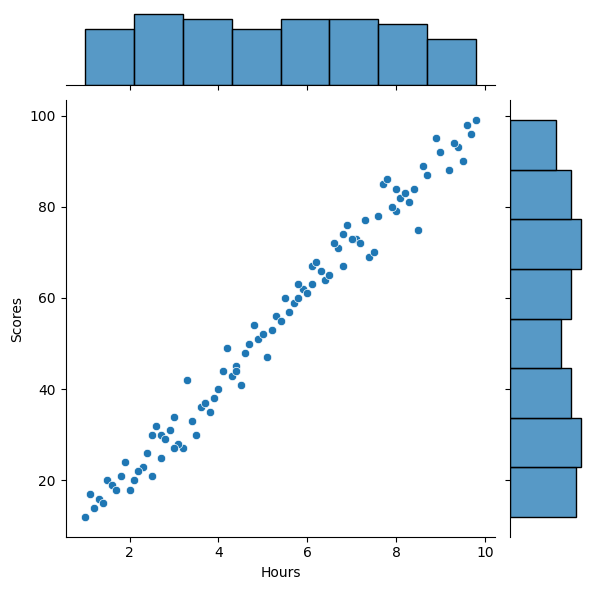

In [ ]:
sns.jointplot(x="Hours", y="Scores", data=df_studyhours)

# 2.2 Preparando los datos y realizando modelo de regresión lineal
Particionando el dataset para la creación de modelos. Esto mediante la función `train_test_split` de scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# extrayendo la información del dataset
x = df_studyhours["Hours"].values.reshape(-1, 1) # Reshape to 2D array
y = df_studyhours["Scores"]

# particionando en dos conjuntos _train y _test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# crear el modelo
regressor = LinearRegression(fit_intercept = True)

# entrenarlo con los datos
regressor.fit(x_train, y_train)  # Now x_train is a 2D array

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [9.94247097], el intersecto (A) es 1.4444319576537907


Text(0.5, 1.0, 'Puntaje vs horas de estudio')

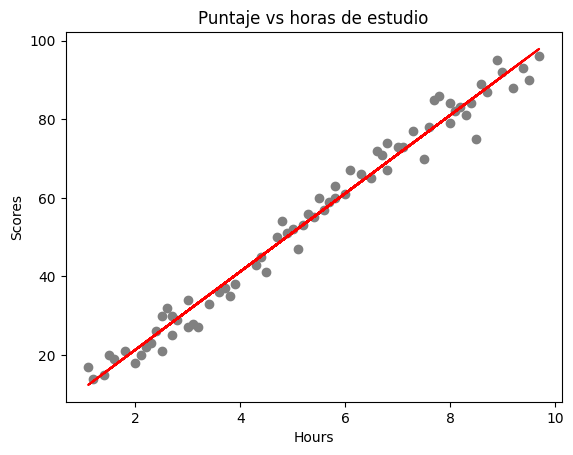

In [ ]:
import matplotlib.pyplot as plt
y_pred = regressor.predict(x_test)
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.title('Puntaje vs horas de estudio')

Text(0.5, 1.0, 'Puntaje vs horas de estudio (testdata)')

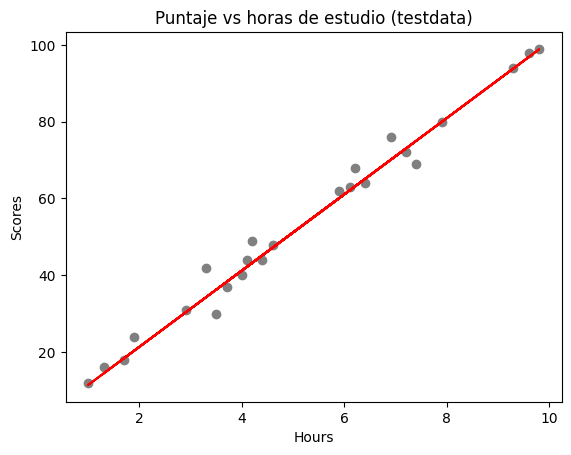

In [ ]:
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, regressor.predict(x_test), color = 'red')
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.title('Puntaje vs horas de estudio (testdata)')

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("R^2:",r2_score(y_test, y_pred))

Mean Squared Error: 10.901856456809798
Root Mean Squared Error: 3.3017959441506672
Mean Absolute Error: 2.3387979177083995
R^2: 0.9826717809861295


(array([2., 0., 0., 5., 6., 6., 0., 2., 2., 1.]),
 array([-6.24308035, -4.84423093, -3.44538151, -2.0465321 , -0.64768268,
         0.75116674,  2.15001616,  3.54886558,  4.947715  ,  6.34656442,
         7.74541384]),
 <BarContainer object of 10 artists>)

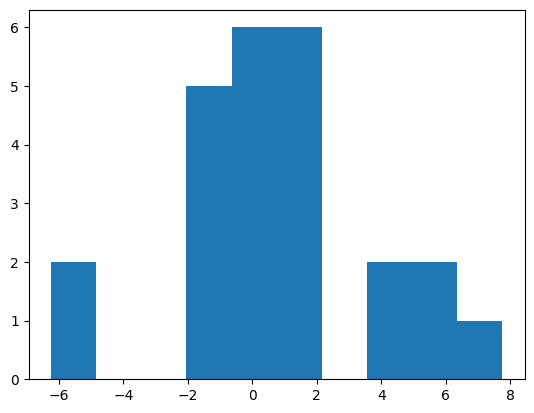

In [ ]:
error = y_test-y_pred
plt.hist(error)